# Data Exploration with Script of Scripts

Bo Peng, May 2016


null device 
          1 


Warning message:
package ‘ggplot2’ was built under R version 3.3.2 


## -- Preview output --

input: 
output: test.jpg


> test.jpg (30.3 KiB)

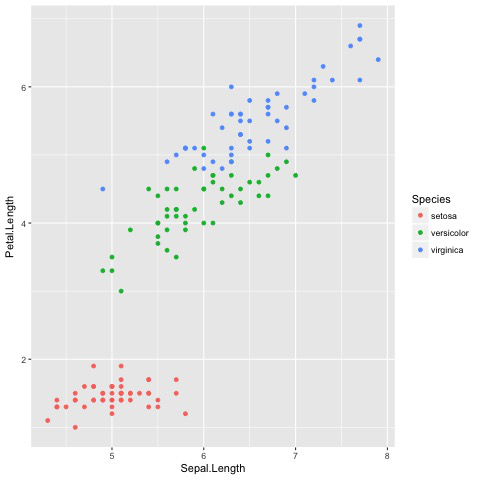

In [7]:
# This SoS step generates test.jpg by calling a R script.

# This is a regular SoS step with specification of dependent
# and output files, and an action (R) written in script style.
# String interpolation is used to pass SoS variable "output"
# to the script.

# this statement specifies step output, defines variable 
# output = ['test.jpg'] and triggers preview of results of
# this step
output: 'test.jpg'
# install ggplot2 if it is not available
depends: R_library('ggplot2')

R:
  library(ggplot2) 
  jpeg('${output}')
  qplot(Sepal.Length, Petal.Length, data = iris, color = Species)
  dev.off()

`geom_smooth()` using method = 'loess'


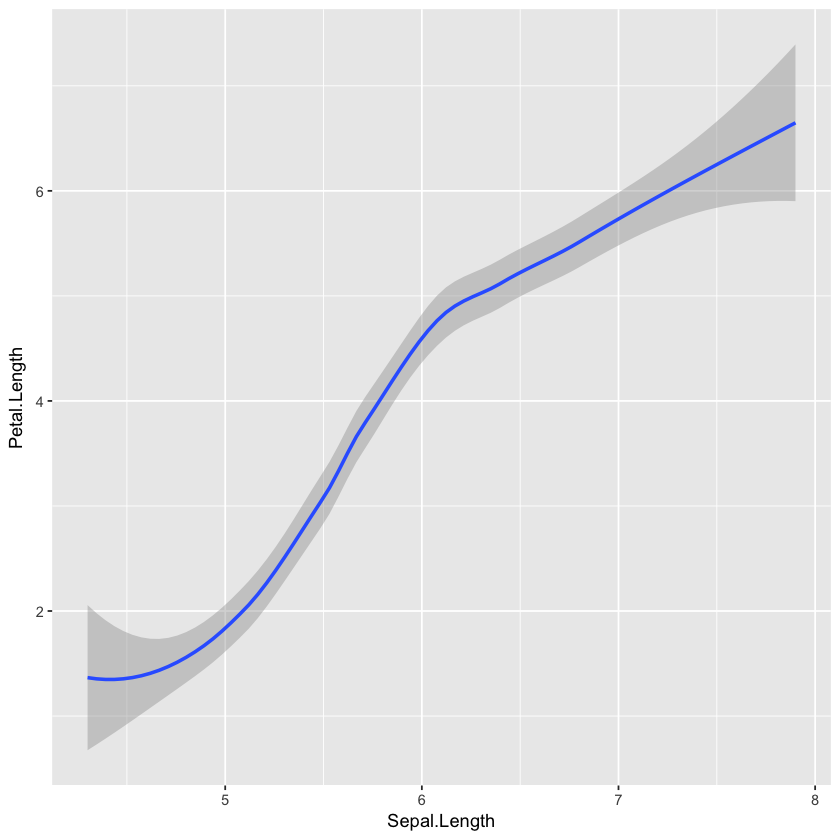

In [8]:
# This cell starts a sub-kernel R and uses it to interpret
# the rest of the content. The kernel will be switched back
# to SoS after the completion of this cell.
%with R

# here we call R directly by using an IR kernel
library(ggplot2)
qplot(Sepal.Length, Petal.Length, data = iris, geom='smooth')

In [9]:
# Generate a random number in SoS (python) and passes
# its result to a shell script using variable num
import random
num = random.randint(1, 1e10)
run:
    echo "Hi, random number generated from Python is ${num}"

Hi, random number generated from Python is 7529449042


In [10]:
# this cell uses the !magic to execute a shell command
# string interpolation is used. Note that the "magic"
# lines can only be preceded with comment or empty lines
!echo "Another random number ${random.randint(1, 100)} "


echo "Another random number 22 "
## -- End interpolated command --


Another random number 22 


In [11]:
# SoS is based on Python so you are free to use any
# Python module and statements
output: 'test.csv'
import numpy as np
import pandas as pd
df = pd.DataFrame(np.random.randn(6,4),columns=list('ABCD'))
df.to_csv(output[0], index=False)

## -- Preview output --

input: 
output: test.csv


> test.csv (480 B)

,A,B,C,D
0,-0.829782,0.463603,-2.084124,-0.169354
1,0.049076,-1.061080,-0.381284,-0.708812
2,0.297122,-1.566144,0.424471,0.102810
3,-0.040836,0.097737,0.605528,1.857410
4,-1.605109,-1.261563,0.646627,1.656139
5,-1.192415,-2.102772,-0.355748,-0.377251


In [12]:
# when we download or generate a file, SoS automatically previews it
output: 'Canis_familiaris.gene_info.gz'
download:
   ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/GENE_INFO/Mammalia/Canis_familiaris.gene_info.gz


0

## -- Preview output --

input: 
output: Canis_familiaris.gene_info.gz


> Canis_familiaris.gene_info.gz (864.1 KiB)
#tax_id	GeneID	Symbol	LocusTag	Synonyms	dbXrefs	chromosome	map_location	description	type_of_gene	Symbol_from_nomenclature_authority	Full_name_from_nomenclature_authority	Nomenclature_status	Other_designations	Modification_date
9615	399518	NPY1R	-	-	Ensembl:ENSCAFG00000008791	15	-	neuropeptide Y receptor Y1	protein-coding	-	-	-	neuropeptide Y receptor type 1|NPY1-R	20161031
9615	399530	ELSPBP1	-	E12|E12A	Ensembl:ENSCAFG00000004061	1	-	epididymal sperm binding protein 1	protein-coding	-	-	-	epididymal sperm-binding protein 1|ceE12|epididymal secretory protein 12	20161031
9615	399544	VWF	-	F8VWF	Ensembl:ENSCAFG00000015228	27	-	von Willebrand factor	protein-coding	-	-	-	von Willebrand factor	20161031
9615	399545	HCRTR2	-	-	Ensembl:ENSCAFG00000002328	12	-	hypocretin receptor 2	protein-coding	-	-	-	orexin receptor type 2|hypocretin receptor type 2|hypocretin/orexin (Hcrt) receptor 2|ox-2-R|ox2-R|ox2R	20161031
